# Pre processing

## Data bekijken

### Eerste keer de data bekijken...

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')


In [22]:
df = pd.read_csv('datasets/train_V2.csv')

In [23]:
df.shape

(5000, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

In [ ]:
(5000-df.isnull().sum()[df.isnull().sum() != 0])/5000*100

income_am           98.94
profit_last_am      98.94
profit_am           98.94
damage_am           99.08
damage_inc          98.94
crd_lim_rec         98.94
credit_use_ic       98.94
gluten_ic           98.94
lactose_ic          98.94
insurance_ic        98.94
spa_ic              99.40
empl_ic             99.98
cab_requests        98.24
bar_no              98.94
sport_ic            98.94
neighbor_income     95.22
age                 98.94
marketing_permit    98.94
urban_ic            98.94
dining_ic           98.24
presidential        98.24
client_segment      98.94
sect_empl           98.94
prev_stay           98.94
prev_all_in_stay    98.94
divorce             98.94
fam_adult_size      98.94
children_no         98.94
tenure_mts          92.16
tenure_yrs          92.16
company_ic          98.94
claims_no           98.94
claims_am           99.46
nights_booked       98.94
gender              98.94
shop_am             98.94
shop_use            98.24
retired             98.94
gold_status 

### Kolommen en values bekijken

We splitsen onze views in 4 gelijke delen, dit is voor ons overzichtelijker (door niet steeds te moeten scrollen, etc ...)

In [8]:
df.iloc[:,0:15].head()

NameError: name 'df' is not defined

In [ ]:
df.iloc[:,15:30].head()

,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts
0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0
1,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0
2,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0
3,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN
4,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0


In [ ]:
df.iloc[:,30:40].head()

,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status
0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0
2,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0


In [ ]:
df.iloc[:,40:55].head()

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00



### Kolommen van categorical type converteren
*married_cd, gender, credit_use_ic, gluten_ic, lactose_ic, insurance_ic, spa_ic, empl_ic, sport_ic, marketing_permit, urban_ic, dining_ic, presidential, prev_stay, prev_all_in_stay, divorce, company_ic, shop_use, retired, gold_status* → **categorische data**


In [ ]:
df['married_cd'] = df['married_cd'].astype('object')
df['gender'] = df['gender'].astype('object')
df['credit_use_ic'] = df['credit_use_ic'].astype('object')
df['gluten_ic'] = df['gluten_ic'].astype('object')
df['lactose_ic'] = df['lactose_ic'].astype('object')
df['insurance_ic'] = df['insurance_ic'].astype('object')
df['spa_ic'] = df['spa_ic'].astype('object')
df['empl_ic'] = df['empl_ic'].astype('object')
df['sport_ic'] = df['sport_ic'].astype('object')
df['marketing_permit'] = df['marketing_permit'].astype('object')
df['urban_ic'] = df['urban_ic'].astype('object')
df['dining_ic'] = df['dining_ic'].astype('object')
df['presidential'] = df['presidential'].astype('object')
df['prev_stay'] = df['prev_stay'].astype('object')
df['prev_all_in_stay'] = df['prev_all_in_stay'].astype('object')
df['divorce'] = df['divorce'].astype('object')
df['company_ic'] = df['company_ic'].astype('object')
df['shop_use'] = df['shop_use'].astype('object')
df['retired'] = df['retired'].astype('object')
df['gold_status'] = df['gold_status'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   object 
 7   gluten_ic              4947 non-null   object 
 8   lactose_ic             4947 non-null   object 
 9   insurance_ic           4947 non-null   object 
 10  spa_ic                 4970 non-null   object 
 11  empl_ic                4999 non-null   object 
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   object 
 14  bar_no                 4947 non-null   float64
 15  spor

### Eigenaardigheden in de beschrijvingen/descriptives(?)


In [ ]:
df.iloc[:,0:20].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.0,4947.0,4947.0,4947.0,4970.0,4999.0,4912.000000,5000,4947.000000,4947.0,4761.000000,4947.000000,4947.0,4947.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,NaN,2.0,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,NaN,0.0,NaN,NaN,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,4743.0,4825.0,4481.0,3013.0,2973.0,4878.0,NaN,4057,NaN,3527.0,NaN,NaN,2496.0,4373.0
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,NaN,NaN,NaN,NaN,NaN,NaN,6.051507,NaN,5.646250,NaN,32778.558916,44.901152,NaN,NaN
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,NaN,NaN,NaN,NaN,NaN,NaN,3.112104,NaN,5.052513,NaN,6858.671948,16.225094,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,16.000000,NaN,NaN
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,28630.000000,31.000000,NaN,NaN
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,5.000000,NaN,31990.000000,45.000000,NaN,NaN
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,8.000000,NaN,35924.000000,57.000000,NaN,NaN


In [ ]:
df.iloc[:,20:40].describe(include='all')

,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status
count,4912.0,4912.0,4947.000000,4947.000000,4947.0,4947.0,4947.0,4947.000000,4947.000000,4608.000000,4608.000000,4947.0,4947.000000,4973.000000,4947.000000,4947,4947.000000,4912.0,4947.0,4947.0
unique,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,2.0,2.0,2.0
top,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M,NaN,0.0,0.0,0.0
freq,4670.0,4891.0,NaN,NaN,4402.0,3697.0,4440.0,NaN,NaN,NaN,NaN,4855.0,NaN,NaN,NaN,2490,NaN,4166.0,4046.0,4775.0
mean,NaN,NaN,1.298565,0.213463,NaN,NaN,NaN,1.960986,0.385082,273.111545,22.780165,NaN,0.218314,121.078826,28.992521,NaN,403.019960,NaN,NaN,NaN
std,NaN,NaN,0.800831,0.826006,NaN,NaN,NaN,0.805545,0.832933,152.498416,12.719429,NaN,0.712408,1783.146726,37.480510,NaN,1335.935144,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,154.000000,13.000000,NaN,0.000000,0.000000,4.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,271.000000,23.000000,NaN,0.000000,0.000000,11.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,3.000000,0.000000,368.250000,31.000000,NaN,0.000000,0.000000,45.000000,NaN,0.000000,NaN,NaN,NaN


In [ ]:
df.iloc[:,40:55].describe(include='all')

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,7.487276e-01,7.516726e-01,7.441403e-01,7.474935e-01,7.449235e-01,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500
max,9.999999e-01,9.999999e-01,9.999999e-01,9.986510e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.993125e-01,9.999999e-01,14.776319,31529.000000,1.000000,3157.240000


### Data plotten


array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'damage_inc'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>],
       [<AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>],
       [<AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>,
        <AxesSubplot:title={'center':'tenure_yrs'}>,
        <AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>],
       [<AxesSubplot:title={'center':'n

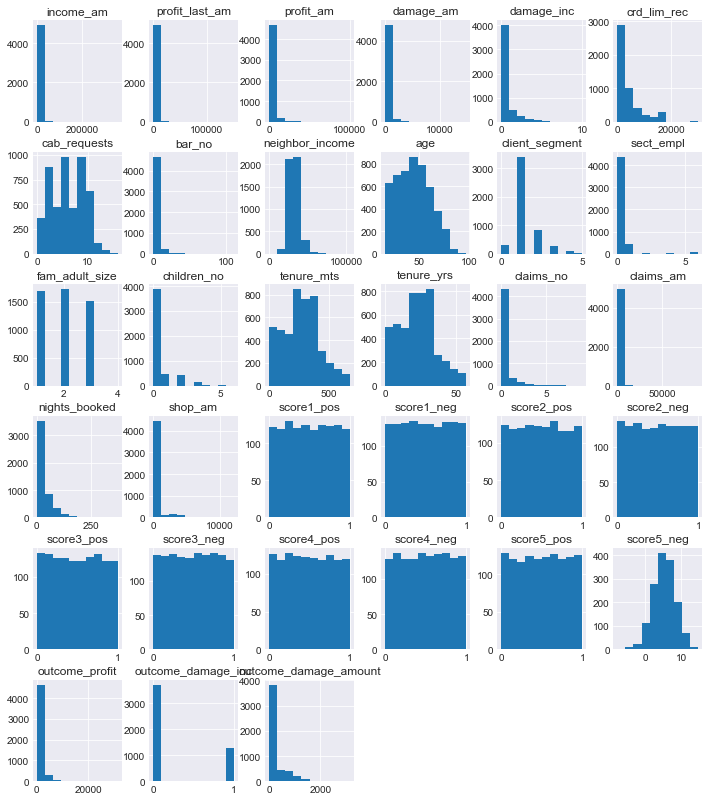

In [ ]:
df.hist( figsize = (12,14))

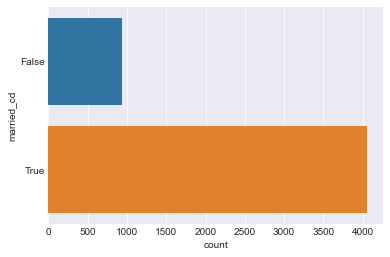

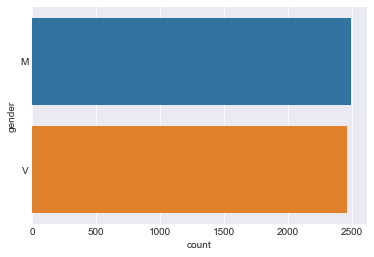

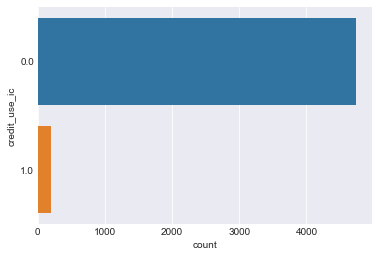

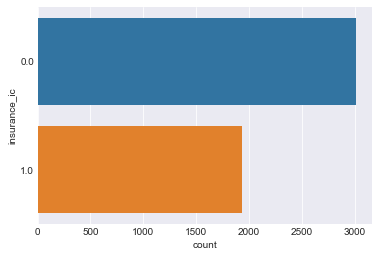

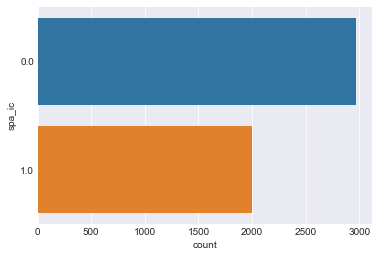

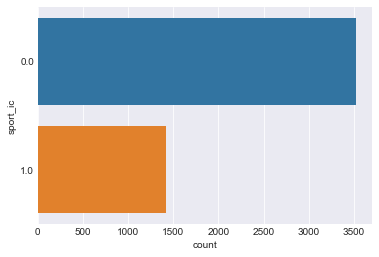

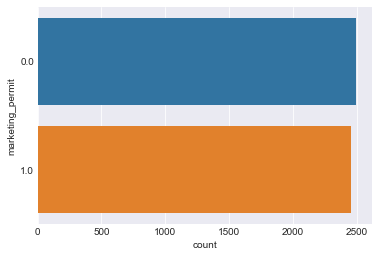

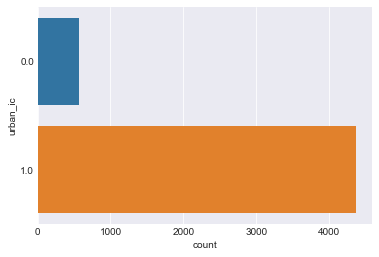

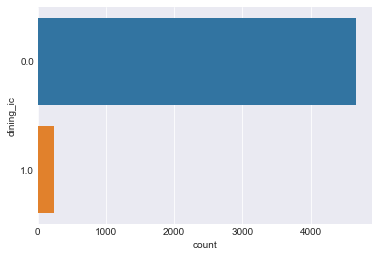

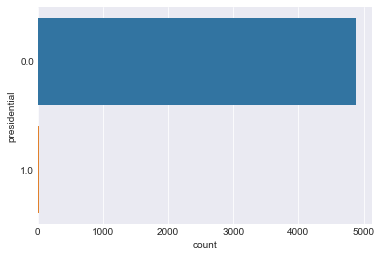

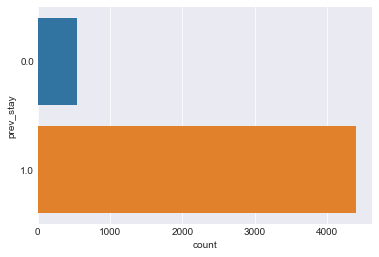

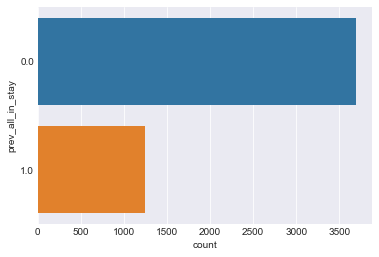

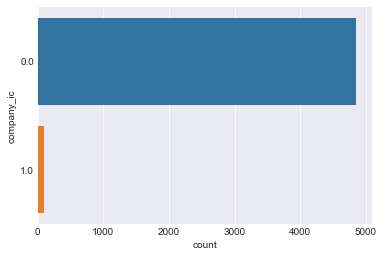

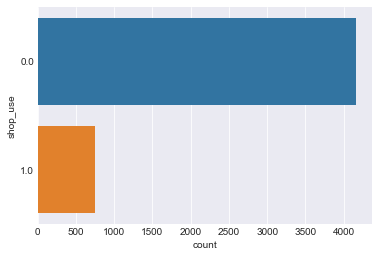

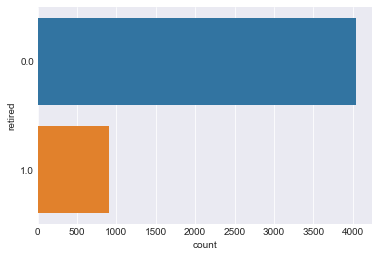

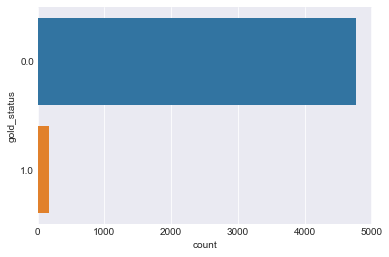

In [ ]:
import seaborn as sns

categorical = ['married_cd', 'gender','credit_use_ic','insurance_ic','spa_ic',
               'sport_ic','marketing_permit','urban_ic','dining_ic','presidential','prev_stay','prev_all_in_stay',
               'company_ic','shop_use','retired','gold_status']
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()

#### Booleans (nullen en éénen/no en yes, ...) in de indicators vervangen

In [ ]:
for col in categorical:
    df[col] = df[col].replace('no','False')
    df[col] = df[col].replace('yes','True')

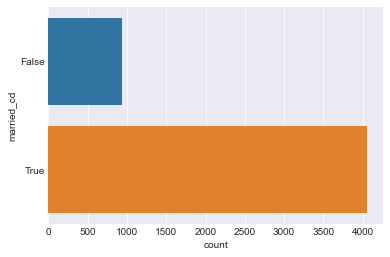

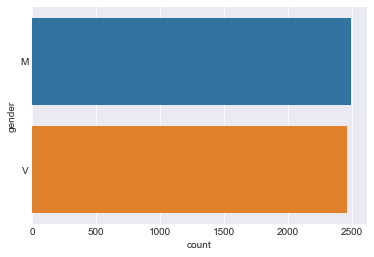

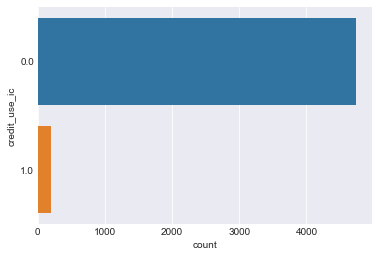

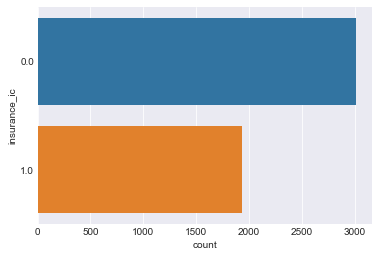

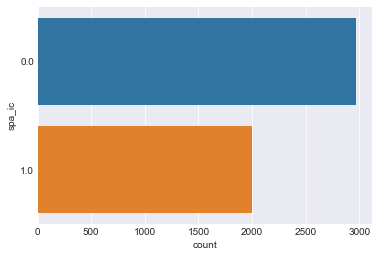

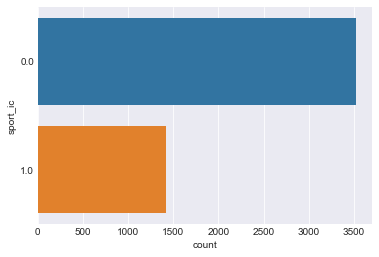

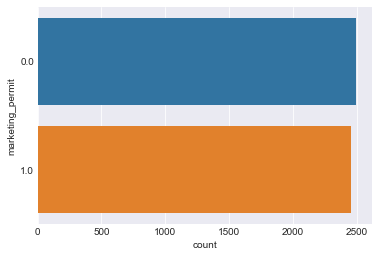

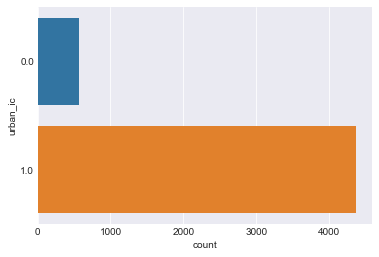

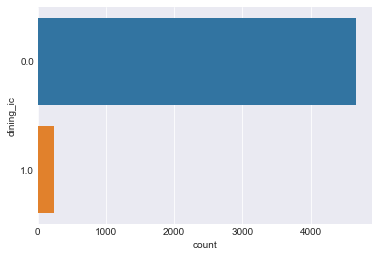

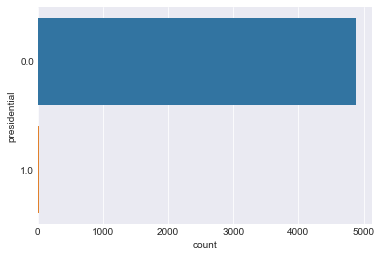

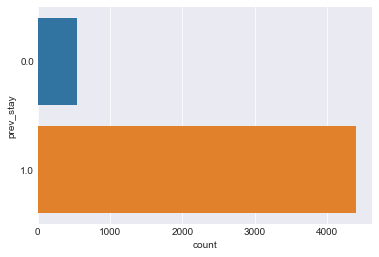

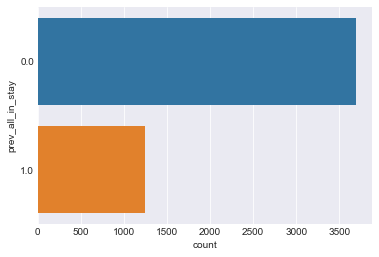

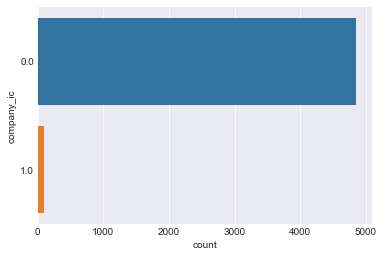

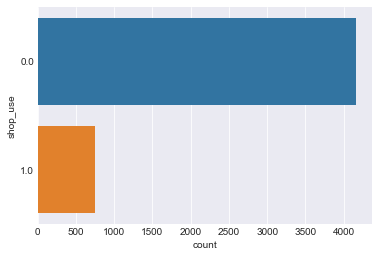

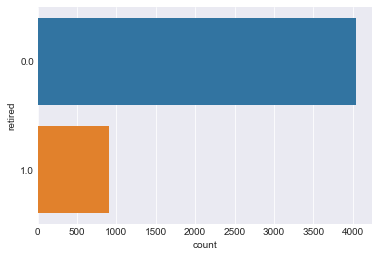

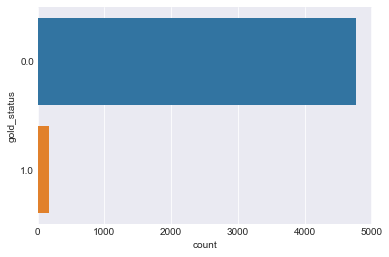

In [ ]:
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()

In [1]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, cmap='RdYlGn')


NameError: name 'df' is not defined

In [ ]:
## Data cleaning


In [ ]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()
print(df_no_dup.shape)

(5000, 53)


### *tenure_mts* of *tenure_yrs* droppen...
*tenure_mts* en *tenure_yrs* hebben beiden dezelfde waarden, maar uitgedrukt in een ander formaat. Ze vertellen ons beiden hoe lang iemand klant is geweest (*tenure_mts* uitgedrukt in maanden en *tenure_yrs* uitgedrukt in jaren). Dit maakt *tenure_yrs* overbodig, omdat *tenure_mts* (maanden) voor een iets nauwkeurigere uitdrukking zorgt.

In [ ]:
df_no_dup = df_no_dup.drop(['tenure_yrs'],1)

### 'Missing data' behandelen

In [ ]:
df_no_dup.isnull().sum()[df_no_dup.isnull().sum()!=0]

income_am             53
profit_last_am        53
profit_am             53
damage_am             46
damage_inc            53
crd_lim_rec           53
credit_use_ic         53
gluten_ic             53
lactose_ic            53
insurance_ic          53
spa_ic                30
empl_ic                1
cab_requests          88
bar_no                53
sport_ic              53
neighbor_income      239
age                   53
marketing_permit      53
urban_ic              53
dining_ic             88
presidential          88
client_segment        53
sect_empl             53
prev_stay             53
prev_all_in_stay      53
divorce               53
fam_adult_size        53
children_no           53
tenure_mts           392
company_ic            53
claims_no             53
claims_am             27
nights_booked         53
gender                53
shop_am               53
shop_use              88
retired               53
gold_status           53
score1_pos          3775
score1_neg          3686


We droppen de features die veel missingness hebben en/of geen meerwaarde bieden aan de algoritmes...

In [ ]:
df_no_dup = df_no_dup.drop(['gluten_ic', 'lactose_ic', 'empl_ic', 'divorce', 'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)

*gluten_ic, lactose_ic* &emsp;>&emsp; Bieden geen directe bijdragen aan het 'gedrag' van een klant...  
*empl_ic* &emsp;>&emsp; Geen invloed op kosten (en gedrag vd klanten)  
*divorce_ic* &emsp; >&emsp; *married_cd* blijft behouden, divorce heeft geen directe invloed op gedrag en kosten...  
*score1-5_pos, score1-5_neg* &emsp;>&emsp; staff scores zouden geen direct verband mogen hebben met kosten of het gedrag van klanten.

In [ ]:
df_no_dup.isnull().sum()[df_no_dup.isnull().sum()!=0]

income_am            53
profit_last_am       53
profit_am            53
damage_am            46
damage_inc           53
crd_lim_rec          53
credit_use_ic        53
insurance_ic         53
spa_ic               30
cab_requests         88
bar_no               53
sport_ic             53
neighbor_income     239
age                  53
marketing_permit     53
urban_ic             53
dining_ic            88
presidential         88
client_segment       53
sect_empl            53
prev_stay            53
prev_all_in_stay     53
fam_adult_size       53
children_no          53
tenure_mts          392
company_ic           53
claims_no            53
claims_am            27
nights_booked        53
gender               53
shop_am              53
shop_use             88
retired              53
gold_status          53
dtype: int64

In [ ]:
df_imputed = df_no_dup.copy()

### Categorische data 'invullen'

In [ ]:
for col in categorical:
    df_imputed[col] = df_imputed[col].astype('category')
    df_imputed[col] = df_imputed[col].cat.add_categories('Undefined')
    df_imputed[col] = df_imputed[col].fillna('Undefined')
    df_imputed[col] = df_imputed[col].astype('object')

In [ ]:
df_imputed.isnull().sum()[df_imputed.isnull().sum()!=0]

income_am           53
profit_last_am      53
profit_am           53
damage_am           46
damage_inc          53
crd_lim_rec         53
cab_requests        88
bar_no              53
neighbor_income    239
age                 53
client_segment      53
sect_empl           53
fam_adult_size      53
children_no         53
tenure_mts         392
claims_no           53
claims_am           27
nights_booked       53
shop_am             53
dtype: int64

### Continuous features 'invullen'

In [ ]:
from sklearn.impute import SimpleImputer
features = df_imputed.copy()
num_feat = features.select_dtypes(include=['int64', 'float64']).columns
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(df_imputed[num_feat])
df_imputed[num_feat] = mean_imputer.transform(df_imputed[num_feat].values)

In [ ]:
df_imputed.isnull().sum()[df_imputed.isnull().sum()!=0]

Series([], dtype: int64)

In [ ]:
df_dummy_var = df_imputed.copy()
for col in df_dummy_var:
    if df_dummy_var[col].dtype ==  'object':
        dummies = pd.get_dummies(df_dummy_var[col], dummy_na=False, prefix=col)  
        df_dummy_var = pd.concat([df_dummy_var, dummies],axis=1)                   
        df_dummy_var.drop(columns=[col], inplace=True)                          

In [ ]:
df_dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_am                   5000 non-null   float64
 1   profit_last_am              5000 non-null   float64
 2   profit_am                   5000 non-null   float64
 3   damage_am                   5000 non-null   float64
 4   damage_inc                  5000 non-null   float64
 5   crd_lim_rec                 5000 non-null   float64
 6   cab_requests                5000 non-null   float64
 7   bar_no                      5000 non-null   float64
 8   neighbor_income             5000 non-null   float64
 9   age                         5000 non-null   float64
 10  client_segment              5000 non-null   float64
 11  sect_empl                   5000 non-null   float64
 12  fam_adult_size              5000 non-null   float64
 13  children_no                 5000 

### Data transformeren en standardiseren
(Op gelijke schaal brengen, ...)

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'damage_inc'}>],
       [<AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>],
       [<AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center'

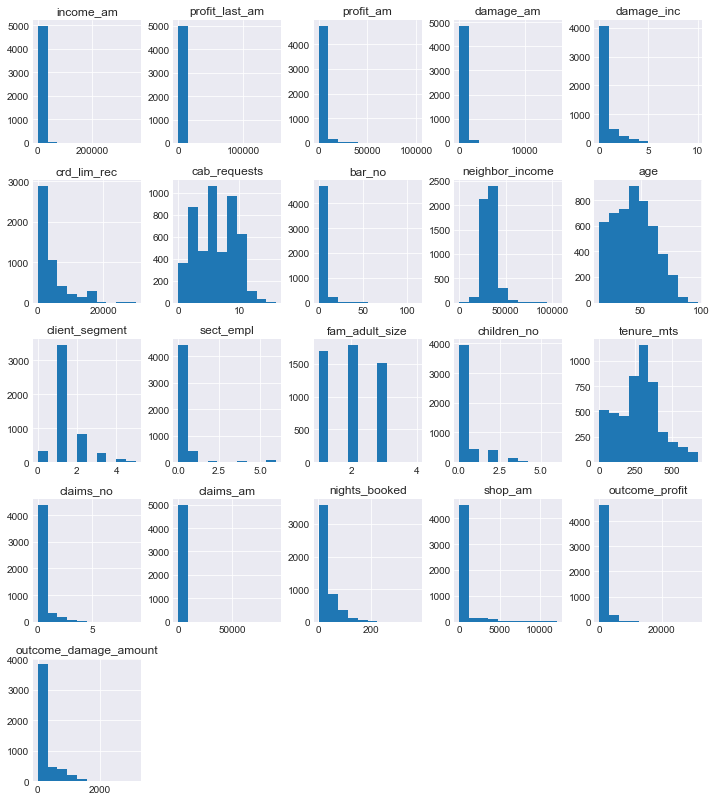

In [ ]:
df_transformed = df_dummy_var.copy()

num = df_transformed.select_dtypes(include=['int64', 'float64']).columns
num = num.drop(['outcome_damage_inc'],1)
df_transformed[num].hist( figsize = (12,14))

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_am                   5000 non-null   float64
 1   profit_last_am              5000 non-null   float64
 2   profit_am                   5000 non-null   float64
 3   damage_am                   5000 non-null   float64
 4   damage_inc                  5000 non-null   float64
 5   crd_lim_rec                 5000 non-null   float64
 6   cab_requests                5000 non-null   float64
 7   bar_no                      5000 non-null   float64
 8   neighbor_income             5000 non-null   float64
 9   age                         5000 non-null   float64
 10  client_segment              5000 non-null   float64
 11  sect_empl                   5000 non-null   float64
 12  fam_adult_size              5000 non-null   float64
 13  children_no                 5000 

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'damage_inc'}>],
       [<AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>],
       [<AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center'

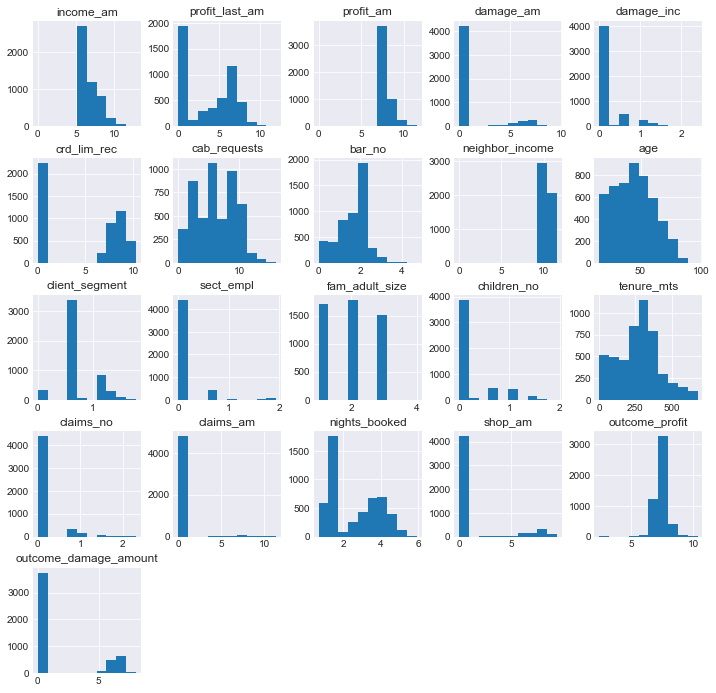

In [ ]:
from scipy.stats import skew
skewed = df_transformed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df_transformed[skewed] = np.log1p(df_transformed[skewed])
df_transformed[num].hist( figsize = (12,12))

In [ ]:
features = df_transformed.copy()
features = features.drop(['outcome_profit', 'outcome_damage_amount', 'outcome_damage_inc'],1)
num_feat = features.select_dtypes(include=['int64', 'float64']).columns

#Robustscaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df_transformed[num_feat])
df_transformed[num_feat] = scaler.transform(df_transformed[num_feat])

prof_temp = df_transformed.copy()
dam_temp = df_transformed.copy()

df_profit = prof_temp.drop(['outcome_damage_amount', 'outcome_damage_inc'], 1)
df_damage_inc = dam_temp.drop(['outcome_damage_amount', 'outcome_profit'], 1)
df_damage_amount = df_transformed.drop(['outcome_profit'], 1)

df_damage_amount = df_damage_amount[df_damage_amount['outcome_damage_inc'] == 1]
df_damage_amount = df_damage_amount.drop(['outcome_damage_inc'], 1)

## Gecleande data opslaan naar (3) CSV('s)
(voor verschillende testing purposes)

In [ ]:
df_profit.to_csv('train_V2_cleaned_profit.csv', index=False)
df_damage_inc.to_csv('train_V2_cleaned_damage_inc.csv', index=False)
df_damage_amount.to_csv('train_V2_cleaned_damage_amount.csv', index=False)